#### Import relevant packages

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
STOPWORDS = set((stopwords.words('english')))

#### Get input data into a Pandas dataframe

In [3]:
twitter_data = pd.read_csv('Sentiment Analysis Dataset.csv', usecols=['Sentiment','SentimentText'])
twitter_data.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


#### Exploratory Data Analysis
Here I explore the data keeping in mind different aspects such as missing values and correlation between various features

In [4]:
twitter_data.shape

(1578614, 2)

Here I check if there are missing values in the data.

In [5]:
twitter_data.isnull().sum()

Sentiment        0
SentimentText    0
dtype: int64

As from above dataframe, my observation on missing data are:

There is no missing values in our dataset.

In [6]:
# checking out the negative comments from the dataset
twitter_data[twitter_data['Sentiment'] == 0].head(10)

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
5,0,or i just worry too much?
7,0,Sunny Again Work Tomorrow :-| ...
10,0,I must think about positive..
12,0,this weekend has sucked so far
13,0,jb isnt showing in australia any more!
14,0,ok thats it you win.


In [7]:
# checking out the possitive comments from the dataset
twitter_data[twitter_data['Sentiment'] == 1].head(10)

,Sentiment,SentimentText
2,1,omg its already 7:30 :O
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,1,handed in my uniform today . i miss you ...
9,1,hmmmm.... i wonder how she my number @-)
11,1,thanks to all the haters up in my face a...
17,1,Feeling strangely fine. Now I'm gonna go l...
22,1,You're the only one who can see this cause...
28,1,"goodbye exams, HELLO ALCOHOL TONIGHT"
38,1,uploading pictures on friendster
41,1,(: !!!!!! - so i wrote something last week. ...


In [8]:
positives = twitter_data['Sentiment'][twitter_data.Sentiment == 1]
negatives = twitter_data['Sentiment'][twitter_data.Sentiment == 0]

print('number of positve tagged sentences is:  {}'.format(len(positives)))
print('number of negative tagged sentences is: {}'.format(len(negatives)))
print('total length of the data is:            {}'.format(twitter_data.shape[0]))

number of positve tagged sentences is:  790178
number of negative tagged sentences is: 788436
total length of the data is:            1578614


Considering the size of the dataset, the labels seem to be ‘about’ evenly distributed at 788435 vs. 790177 for negative and positive respectively

In [9]:
# find words in a tweet
def word_count(sentence):
    return len(sentence.split())
    
twitter_data['wordcount'] = twitter_data['SentimentText'].apply(word_count)
twitter_data.head()

,Sentiment,SentimentText,wordcount
0,0,is so sad for my APL frie...,7
1,0,I missed the New Moon trail...,6
2,1,omg its already 7:30 :O,5
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,25
4,0,i think mi bf is cheating on me!!! ...,9


#### Text Processing
Steps involved in text processing are:
1. Cleaning of Raw Data
2. Tokenization
3. lemmatization

#### Cleaning of Raw Data
I created different following funtions to clean up every tweet in the dataset.
1. Lowering case
2. Removal of mentions
3. Removal of special characters
4. Removal of stopwords
5. Removal of hyperlinks
6. Removal of numbers
7. Removal of whitespaces
8. Removal of punctuations

In [10]:
def to_lower(sentiment_text):
    result = sentiment_text.lower()
    return result

In [11]:
twitter_data['SentimentText'] = twitter_data['SentimentText'].apply(to_lower)
twitter_data['SentimentText'].head(10)

0                         is so sad for my apl frie...
1                       i missed the new moon trail...
2                              omg its already 7:30 :o
3              .. omgaga. im sooo  im gunna cry. i'...
4             i think mi bf is cheating on me!!!   ...
5                    or i just worry too much?        
6                   juuuuuuuuuuuuuuuuussssst chillin!!
7           sunny again        work tomorrow  :-|  ...
8          handed in my uniform today . i miss you ...
9             hmmmm.... i wonder how she my number @-)
Name: SentimentText, dtype: object

In [12]:
def remove_hyperlink(sentiment_text):
    return  re.sub(r"http\S+", "", sentiment_text)

In [13]:
twitter_data['SentimentText'] = twitter_data['SentimentText'].apply(remove_hyperlink)
twitter_data['SentimentText'].head(10)

0                         is so sad for my apl frie...
1                       i missed the new moon trail...
2                              omg its already 7:30 :o
3              .. omgaga. im sooo  im gunna cry. i'...
4             i think mi bf is cheating on me!!!   ...
5                    or i just worry too much?        
6                   juuuuuuuuuuuuuuuuussssst chillin!!
7           sunny again        work tomorrow  :-|  ...
8          handed in my uniform today . i miss you ...
9             hmmmm.... i wonder how she my number @-)
Name: SentimentText, dtype: object

In [14]:
def remove_mentions(sentiment_text):
    return re.sub(r"@\S+", "", sentiment_text)

In [15]:
twitter_data['SentimentText'] = twitter_data['SentimentText'].apply(remove_mentions)
twitter_data['SentimentText'].head(10)

0                         is so sad for my apl frie...
1                       i missed the new moon trail...
2                              omg its already 7:30 :o
3              .. omgaga. im sooo  im gunna cry. i'...
4             i think mi bf is cheating on me!!!   ...
5                    or i just worry too much?        
6                   juuuuuuuuuuuuuuuuussssst chillin!!
7           sunny again        work tomorrow  :-|  ...
8          handed in my uniform today . i miss you ...
9                hmmmm.... i wonder how she my number 
Name: SentimentText, dtype: object

In [16]:
def remove_number(sentiment_text):
    result = re.sub(r'\d+', '', sentiment_text)
    return result

In [17]:
twitter_data['SentimentText'] = twitter_data['SentimentText'].apply(remove_number)
twitter_data['SentimentText'].head(10)

0                         is so sad for my apl frie...
1                       i missed the new moon trail...
2                                 omg its already : :o
3              .. omgaga. im sooo  im gunna cry. i'...
4             i think mi bf is cheating on me!!!   ...
5                    or i just worry too much?        
6                   juuuuuuuuuuuuuuuuussssst chillin!!
7           sunny again        work tomorrow  :-|  ...
8          handed in my uniform today . i miss you ...
9                hmmmm.... i wonder how she my number 
Name: SentimentText, dtype: object

In [18]:
def remove_punctuation(sentiment_text):
    result = re.sub('[^A-Za-z]+', ' ', sentiment_text)
    return result

In [19]:
twitter_data['SentimentText'] = twitter_data['SentimentText'].apply(remove_punctuation)
twitter_data['SentimentText'].head(10)

0                         is so sad for my apl friend 
1                       i missed the new moon trailer 
2                                    omg its already o
3     omgaga im sooo im gunna cry i ve been at this...
4                  i think mi bf is cheating on me t t
5                            or i just worry too much 
6                    juuuuuuuuuuuuuuuuussssst chillin 
7                 sunny again work tomorrow tv tonight
8        handed in my uniform today i miss you already
9                    hmmmm i wonder how she my number 
Name: SentimentText, dtype: object

In [20]:
def remove_whitespace(sentiment_text):
    result = sentiment_text.strip()
    return result

In [21]:
twitter_data['SentimentText'] = twitter_data['SentimentText'].apply(remove_whitespace)
twitter_data['SentimentText'].head(10)

0                          is so sad for my apl friend
1                        i missed the new moon trailer
2                                    omg its already o
3    omgaga im sooo im gunna cry i ve been at this ...
4                  i think mi bf is cheating on me t t
5                             or i just worry too much
6                     juuuuuuuuuuuuuuuuussssst chillin
7                 sunny again work tomorrow tv tonight
8        handed in my uniform today i miss you already
9                     hmmmm i wonder how she my number
Name: SentimentText, dtype: object

In [22]:
def replace_newline(sentiment_text):
    return sentiment_text.replace('\n',' ')

In [23]:
twitter_data['SentimentText'] = twitter_data['SentimentText'].apply(replace_newline)
twitter_data['SentimentText'].head(10)

0                          is so sad for my apl friend
1                        i missed the new moon trailer
2                                    omg its already o
3    omgaga im sooo im gunna cry i ve been at this ...
4                  i think mi bf is cheating on me t t
5                             or i just worry too much
6                     juuuuuuuuuuuuuuuuussssst chillin
7                 sunny again work tomorrow tv tonight
8        handed in my uniform today i miss you already
9                     hmmmm i wonder how she my number
Name: SentimentText, dtype: object

In [24]:
def reomve_two_letter_word(sentiment_text):
    result = re.sub(r'\b\w{1,2}\b', '', sentiment_text)
    return result

In [25]:
twitter_data['SentimentText'] = twitter_data['SentimentText'].apply(reomve_two_letter_word)
twitter_data['SentimentText'].head(10)

0                                  sad for  apl friend
1                          missed the new moon trailer
2                                     omg its already 
3    omgaga  sooo  gunna cry   been  this dentist s...
4                                think    cheating    
5                                  just worry too much
6                     juuuuuuuuuuuuuuuuussssst chillin
7                   sunny again work tomorrow  tonight
8             handed   uniform today  miss you already
9                        hmmmm  wonder how she  number
Name: SentimentText, dtype: object

### Tokenization

In [26]:
twitter_data['SentimentText'] = twitter_data['SentimentText'].apply(word_tokenize)

In [27]:
twitter_data.head()

,Sentiment,SentimentText,wordcount
0,0,"[sad, for, apl, friend]",7
1,0,"[missed, the, new, moon, trailer]",6
2,1,"[omg, its, already]",5
3,0,"[omgaga, sooo, gunna, cry, been, this, dentist...",25
4,0,"[think, cheating]",9


In [28]:
def remove_stopwords(sentiment_text):
    return [word for word in sentiment_text if not word in STOPWORDS]

In [29]:
twitter_data['SentimentText'] = twitter_data['SentimentText'].apply(remove_stopwords)
twitter_data.head(10)

,Sentiment,SentimentText,wordcount
0,0,"[sad, apl, friend]",7
1,0,"[missed, new, moon, trailer]",6
2,1,"[omg, already]",5
3,0,"[omgaga, sooo, gunna, cry, dentist, since, sup...",25
4,0,"[think, cheating]",9
5,0,"[worry, much]",6
6,1,"[juuuuuuuuuuuuuuuuussssst, chillin]",2
7,0,"[sunny, work, tomorrow, tonight]",7
8,1,"[handed, uniform, today, miss, already]",10
9,1,"[hmmmm, wonder, number]",8


### Lemmatization

In [30]:
lemmatizer = WordNetLemmatizer()
def lemmatizer_on_text(words):
    lemmatizer_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatizer_words
twitter_data['SentimentText']= twitter_data['SentimentText'].apply(lambda x: lemmatizer_on_text(x))

In [31]:
twitter_data.head()

,Sentiment,SentimentText,wordcount
0,0,"[sad, apl, friend]",7
1,0,"[missed, new, moon, trailer]",6
2,1,"[omg, already]",5
3,0,"[omgaga, sooo, gunna, cry, dentist, since, sup...",25
4,0,"[think, cheating]",9


### Top 10 most positive and negative words 

In [32]:
positive_tweets = twitter_data[twitter_data['Sentiment'] == 1]
negative_tweets = twitter_data[twitter_data['Sentiment'] == 0]

In [33]:
positive_tweets.head()

,Sentiment,SentimentText,wordcount
2,1,"[omg, already]",5
6,1,"[juuuuuuuuuuuuuuuuussssst, chillin]",2
8,1,"[handed, uniform, today, miss, already]",10
9,1,"[hmmmm, wonder, number]",8
11,1,"[thanks, hater, face, day]",12


In [34]:
negative_tweets.head()

,Sentiment,SentimentText,wordcount
0,0,"[sad, apl, friend]",7
1,0,"[missed, new, moon, trailer]",6
3,0,"[omgaga, sooo, gunna, cry, dentist, since, sup...",25
4,0,"[think, cheating]",9
5,0,"[worry, much]",6


In [35]:
positive_tweets_list = positive_tweets['SentimentText'].tolist()
negative_tweets_list = negative_tweets['SentimentText'].tolist()

In [36]:
positive_words = [word for sublist in positive_tweets_list for word in sublist]

In [37]:
from collections import Counter

In [38]:
top_10_positive_words = Counter(positive_words).most_common(10)

In [39]:
top_10_positive_words

[('good', 60861),
 ('day', 55570),
 ('love', 50259),
 ('quot', 45368),
 ('like', 38296),
 ('get', 38085),
 ('lol', 35989),
 ('thanks', 34591),
 ('time', 33991),
 ('got', 31678)]

Above numbers show top 10 most positive words in the positive tweets.

In [40]:
negative_words = [word for sublist in negative_tweets_list for word in sublist]

In [41]:
top_10_negative_words = Counter(negative_words).most_common(10)

In [42]:
top_10_negative_words

[('day', 51744),
 ('get', 47930),
 ('work', 45547),
 ('like', 41371),
 ('got', 38435),
 ('today', 38109),
 ('want', 33694),
 ('going', 33421),
 ('back', 32676),
 ('miss', 31551)]

The above numbers show top 10 most negative words in the negative tweets.

### Plot most frequent words using Zipf's Law

In [43]:
twitter_data_list = twitter_data['SentimentText'].tolist()

In [44]:
twitter_data_words = [word for sublist in twitter_data_list for word in sublist]
top_word_frequencies = Counter(twitter_data_words).most_common(50)

In [45]:
top_word_frequencies

[('day', 107314),
 ('good', 89857),
 ('get', 86015),
 ('like', 79667),
 ('quot', 71241),
 ('got', 70113),
 ('today', 68111),
 ('love', 67969),
 ('work', 66940),
 ('time', 65330),
 ('going', 63970),
 ('lol', 59091),
 ('one', 57067),
 ('back', 56260),
 ('know', 53920),
 ('really', 49625),
 ('amp', 48209),
 ('want', 47897),
 ('see', 46296),
 ('night', 45538),
 ('think', 43688),
 ('still', 43348),
 ('well', 42532),
 ('new', 42127),
 ('need', 40512),
 ('thanks', 40411),
 ('na', 40171),
 ('home', 39930),
 ('miss', 37361),
 ('much', 36906),
 ('last', 35717),
 ('feel', 35035),
 ('make', 34598),
 ('hope', 34582),
 ('tomorrow', 33998),
 ('morning', 33930),
 ('great', 33415),
 ('twitter', 33205),
 ('haha', 31373),
 ('wish', 30246),
 ('sad', 29258),
 ('fun', 28532),
 ('come', 28463),
 ('week', 28186),
 ('sleep', 28086),
 ('right', 28007),
 ('would', 27249),
 ('bad', 27072),
 ('thing', 26443),
 ('happy', 26372)]

In [46]:
rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
zipf_data = pd.DataFrame(columns = column_header )
#zif_data.head()

In [47]:
for word , freq in top_word_frequencies:
    zipf_data.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1
    
print (zipf_data)

         Rank Frequency Frequency * Rank
day         1    107314           107314
good        2     89857           179714
get         3     86015           258045
like        4     79667           318668
quot        5     71241           356205
got         6     70113           420678
today       7     68111           476777
love        8     67969           543752
work        9     66940           602460
time       10     65330           653300
going      11     63970           703670
lol        12     59091           709092
one        13     57067           741871
back       14     56260           787640
know       15     53920           808800
really     16     49625           794000
amp        17     48209           819553
want       18     47897           862146
see        19     46296           879624
night      20     45538           910760
think      21     43688           917448
still      22     43348           953656
well       23     42532           978236
new        24   

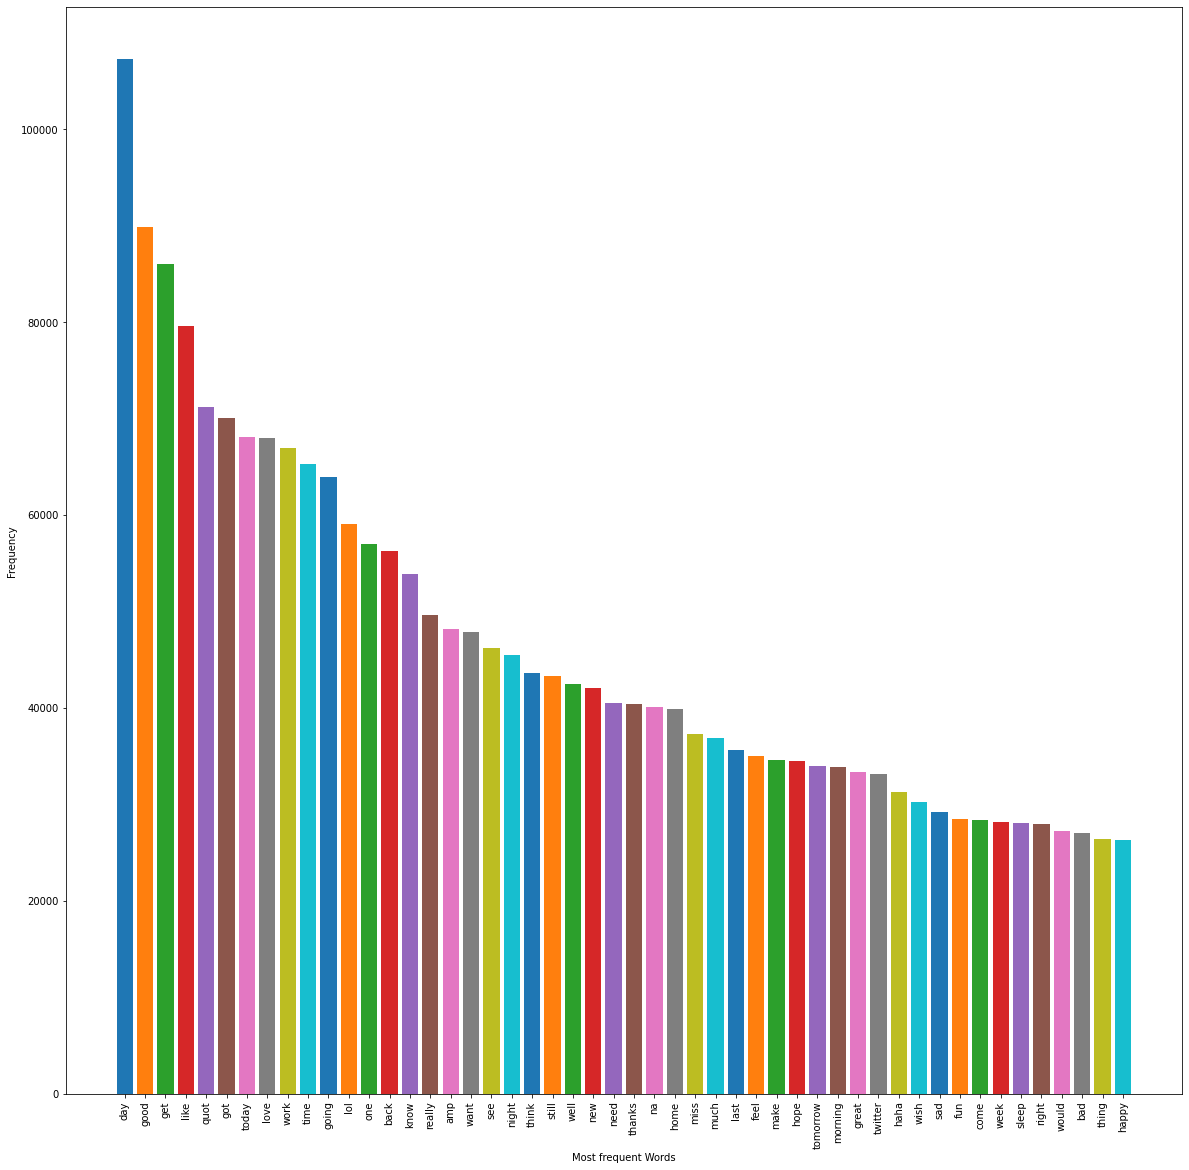

In [48]:
plt.figure(figsize=(20,20))  #to increase the plot resolution
plt.ylabel("Frequency")
plt.xlabel("Most frequent Words")
plt.xticks(rotation=90)    #to rotate x-axis values

for word , freq in top_word_frequencies:
    plt.bar(word, freq)    
plt.show()

From the graph above, most frequent word is 'day' and repeated 107314 time in the tweets.

### Bag of words

We'll convert each tweet which is represented by a list of tokens into a vector that a machine learning model can understand.
To do this we use the 'Bag of words'.

In [49]:
matrix = CountVectorizer()
x = matrix.fit_transform(twitter_data['SentimentText'].astype("str"))
y = twitter_data.iloc[:, 0]

print(x.shape)
print(y.shape)

(1578614, 256080)
(1578614,)


### Pepare data for training model

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=False)

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Model Building

In [52]:
logestic_reg_model = LogisticRegression(solver='lbfgs',max_iter=1000)
logestic_reg_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logestic_reg_model.predict(x_test)

### Model Evaluation

In [56]:
def show_model_evaluation_metrics(y, y_predicted):
    print("Training Accuracy :", logestic_reg_model.score(x_train, y_train))
    print("Test Accuracy :", logestic_reg_model.score(x_test, y_test))
    print("f1 score :", f1_score(y_test, y_pred))

The evaluation metrics for test data

In [58]:
show_model_evaluation_metrics(y_test, y_pred)

Training Accuracy : 0.8240521153448714
Test Accuracy : 0.7574392743005736
f1 score : 0.7623699088353388


Here, I also show the evaluation metrics for training data because the comparison between training metrics and test metrics tells us if our model is under or overfitting.